# Customer Product Review: Sentiment Analysis
-----
-----

In [1]:
from sklearn.svm import LinearSVC
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import SGDClassifier
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('245_1_part3.csv')

In [3]:
dataset.head()

,Unnamed: 0,brand,categories,manufacturer,reviews.rating,reviews.text,label,reviews.text_reduce
0,0,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,5,i love this album. it's very good. more to the...,positive,i love this album. it's very good. more to the...
1,1,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,5,Good flavor. This review was collected as part...,positive,Good flavor. This review was collected as part...
2,2,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,5,Good flavor.,positive,Good flavor.
3,3,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,1,I read through the reviews on here before look...,negative,I read through the reviews on here before look...
4,4,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,1,My husband bought this gel for us. The gel cau...,negative,My husband bought this gel for us. The gel cau...


In [4]:
dataset.tail()

,Unnamed: 0,brand,categories,manufacturer,reviews.rating,reviews.text,label,reviews.text_reduce
70862,70862,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,5,I'm dealing with dry eyes and very sensitive t...,negative,I'm dealing with dry eyes and very sensitive t...
70863,70863,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,5,Great stuff! Helps keep my contacts moist all ...,positive,Great stuff! Helps keep my contacts moist all ...
70864,70864,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,5,Right price,negative,Right price
70865,70865,Bebe Au Lait,"Baby,Nursing & Feeding,Breastfeeding,Nursing C...",Bebe au Lait,5,I was so pleased when this scarf arrived for m...,positive,I was so pleased when this scarf arrived for m...
70866,70866,UMGD,"Movies, Music & Books,Music,Gospel & Christian...",Def Jam,5,"Excellent album, makes the holidays better, gi...",positive,"Excellent album, makes the holidays better, gi..."


In [5]:
dataset.shape

(70867, 8)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70867 entries, 0 to 70866
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           70867 non-null  int64 
 1   brand                70867 non-null  object
 2   categories           70867 non-null  object
 3   manufacturer         70867 non-null  object
 4   reviews.rating       70867 non-null  int64 
 5   reviews.text         70867 non-null  object
 6   label                70867 non-null  object
 7   reviews.text_reduce  70867 non-null  object
dtypes: int64(2), object(6)
memory usage: 4.3+ MB


In [7]:
dataset.describe()

,Unnamed: 0,reviews.rating
count,70867.0000,70867.000000
mean,35433.0000,4.385850
std,20457.6851,1.068197
min,0.0000,1.000000
25%,17716.5000,4.000000
50%,35433.0000,5.000000
75%,53149.5000,5.000000
max,70866.0000,5.000000


In [8]:
dataset['label'].value_counts()

label
positive    62033
negative     8834
Name: count, dtype: int64

In [9]:
dataset.columns

Index(['Unnamed: 0', 'brand', 'categories', 'manufacturer', 'reviews.rating',
       'reviews.text', 'label', 'reviews.text_reduce'],
      dtype='object')

In [10]:
dataset['brand'].value_counts()

brand
Clorox                  10700
Universal Home Video     6178
Tide                     5384
FOX                      4498
Disney                   3692
                        ...  
Fit System                  1
SLOAN VALVE COMPANY         1
Black Radiance              1
Cheez-It                    1
Bebe Au Lait                1
Name: count, Length: 391, dtype: int64

In [11]:
dataset['categories'].value_counts()

categories
Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners    8606
Featured Brands,Character Shop,The Secret Life Of Pets,Movies, Music & Books,Movies,Kids' & Family,Movies & TV,4K Ultra HD Movies,Movies & Music,Movies & TV Shows,Blu-ray                                                                                                                                                                                                                                                                                                              5510
Movies, Music & Books,Movies,Action

In [12]:
dataset.isnull().sum()

Unnamed: 0             0
brand                  0
categories             0
manufacturer           0
reviews.rating         0
reviews.text           0
label                  0
reviews.text_reduce    0
dtype: int64

In [13]:
dataset.dropna(inplace=True)

In [14]:
dataset.isnull().sum().sum()

0

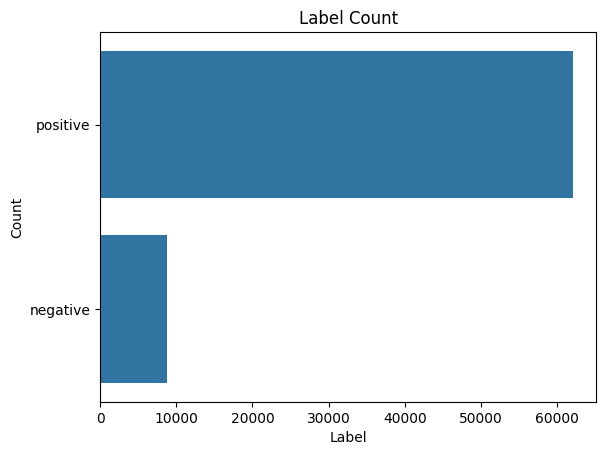

In [15]:
sns.countplot(dataset['label'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Count')
plt.show()

<Axes: >

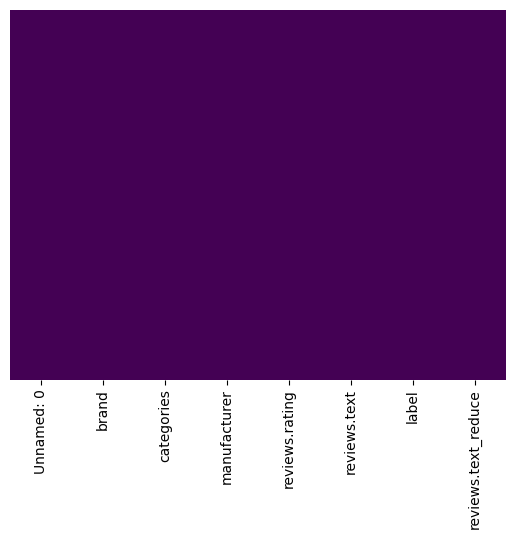

In [16]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Data Cleaning:
------

### Selecting Required Columns:

In [17]:
dataset = dataset[['brand','manufacturer','reviews.text_reduce','reviews.rating', 'reviews.text']]

### Checking Null values:

In [18]:
dataset.isnull().sum()

brand                  0
manufacturer           0
reviews.text_reduce    0
reviews.rating         0
reviews.text           0
dtype: int64

### Inputing null values on 'reviews.didpurchase' & Removing all the null values:

In [19]:
dataset['reviews.text_reduce'] = dataset['reviews.text_reduce'].fillna('Not Avialable') 

In [20]:
dataset = dataset.dropna()

## Visualizing The Result:
----

### Review Ratings Distribution:
-----

In [21]:
data = dataset['reviews.rating'].value_counts()

<Axes: xlabel='reviews.rating'>

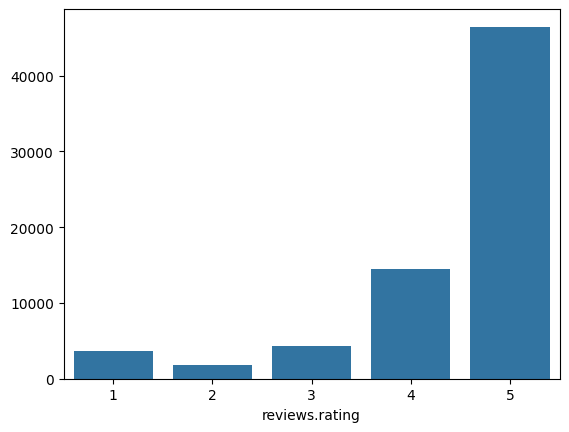

In [22]:
sns.barplot(x=data.index, y=data.values)

**Need to map 1,2 - Unhappy, 3-OK and 4,5 - Happy**

### Fake Reviews Provided by User:
-----

**True reviews are less in number and as you can see poeple who didn't even purchase the product has provided reviews these are all fake reviews which are much higher than those who have purchased and provided the review.**

### Wordcloud
----

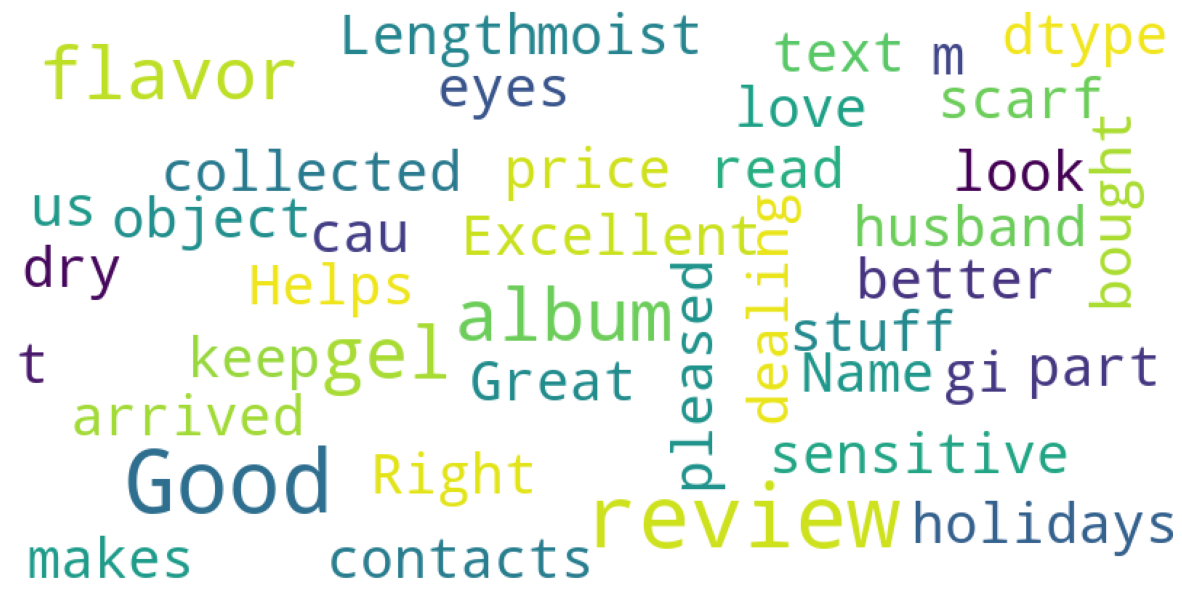

In [23]:
stopwords = set(STOPWORDS)
def wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=250,
        max_font_size=30,
        scale=2,
        random_state=5 #chosen a andom by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

wordcloud(dataset['reviews.text'])

## Feature Transformation:
-----

In [24]:
data=dataset['reviews.text']
train_data=dataset['reviews.text']
y_target=dataset['reviews.rating'].map({1:'Unhappy',2:'Unhappy',3:'Ok',4:'Happy',5:'Happy'})

In [25]:
vectorize_word = TfidfVectorizer(sublinear_tf=True,strip_accents='unicode',analyzer='word',token_pattern=r'\w{1,}',stop_words='english',ngram_range=(1, 1),max_features=10000)
vectorize_word.fit(data)
train_features_word = vectorize_word.transform(train_data)

In [26]:
vectorize_char = TfidfVectorizer(sublinear_tf=True,strip_accents='unicode',analyzer='char',stop_words='english',ngram_range=(2, 6),max_features=50000)
vectorize_char.fit(data)
train_features_char = vectorize_char.transform(train_data)
train_features = hstack([train_features_char, train_features_word])

c:\Users\saidi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:547: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


In [27]:
X_train, X_test, y_train, y_test = train_test_split(train_features, y_target,test_size=0.3,random_state=101,shuffle=True)

## SVC Model:
----

In [28]:
lsvm = LinearSVC(class_weight='balanced')
l = lsvm.fit(X_train,y_train)

c:\Users\saidi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


### Linear SVC Metric Over Training:

In [29]:
pred_train = l.predict(X_train) 

In [30]:
print("Accuracy Train: {}".format(accuracy_score(y_train,pred_train)))
print(classification_report(y_train,pred_train))

Accuracy Train: 0.9886908841672378
              precision    recall  f1-score   support

       Happy       1.00      0.99      0.99     42745
          Ok       0.89      0.97      0.93      3014
     Unhappy       0.97      1.00      0.99      3847

    accuracy                           0.99     49606
   macro avg       0.95      0.99      0.97     49606
weighted avg       0.99      0.99      0.99     49606



In [31]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,pred_train)

array([[42287,   364,    94],
       [   83,  2925,     6],
       [    8,     6,  3833]], dtype=int64)

### Linear SVC Metric Over Test:

In [32]:
pred_test=l.predict(X_test)

In [33]:
print("Accuracy Test : {}".format(accuracy_score(y_test,pred_test)))
print(classification_report(y_test,pred_test))

Accuracy Test : 0.9013216687832181
              precision    recall  f1-score   support

       Happy       0.95      0.95      0.95     18243
          Ok       0.39      0.38      0.39      1336
     Unhappy       0.75      0.74      0.75      1682

    accuracy                           0.90     21261
   macro avg       0.70      0.69      0.70     21261
weighted avg       0.90      0.90      0.90     21261



## SGD Classifier:
----

In [34]:
svm1=SGDClassifier(class_weight='balanced',n_jobs=-1)
svm1.fit(X_train,y_train)

SGDClassifier(class_weight='balanced', n_jobs=-1)

### SGD Metric Over Training:

In [35]:
pred_train_sgd=svm1.predict(X_train)
print("Accuracy Train: {}".format(accuracy_score(y_train,pred_train_sgd)))
print(classification_report(y_train,pred_train_sgd))

Accuracy Train: 0.9392210619683102
              precision    recall  f1-score   support

       Happy       0.98      0.96      0.97     42745
          Ok       0.61      0.71      0.66      3014
     Unhappy       0.82      0.88      0.85      3847

    accuracy                           0.94     49606
   macro avg       0.80      0.85      0.83     49606
weighted avg       0.94      0.94      0.94     49606



In [36]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,pred_train_sgd)

array([[41052,  1158,   535],
       [  679,  2139,   196],
       [  232,   215,  3400]], dtype=int64)

### SGD Metric Over Test:

In [37]:
pred_test_sgd=svm1.predict(X_test)
print("Accuracy Test: {}".format(accuracy_score(y_test,pred_test_sgd)))
print(classification_report(y_test,pred_test_sgd))

Accuracy Test: 0.899487324208645
              precision    recall  f1-score   support

       Happy       0.95      0.95      0.95     18243
          Ok       0.40      0.40      0.40      1336
     Unhappy       0.71      0.76      0.73      1682

    accuracy                           0.90     21261
   macro avg       0.69      0.70      0.70     21261
weighted avg       0.90      0.90      0.90     21261



c:\Users\saidi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\saidi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


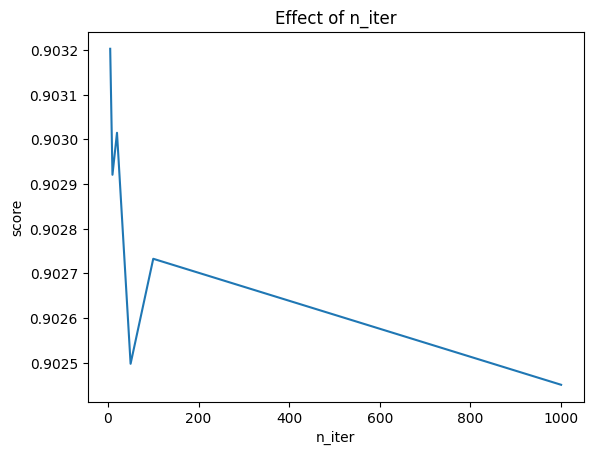

In [41]:
n_iters = [5, 10, 20, 50, 100, 1000]
scores = []
for n_iter in n_iters:
    clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=n_iter)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
  
plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores)